In [ ]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.metrics import FalseNegatives
from keras.metrics import FalsePositives
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import gzip
import PIL
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from numpy import asarray
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
from keras.utils import plot_model
# tf.compat.v1.disable_eager_execution()
from sklearn import linear_model
import pandas as pd

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
zip = zipfile.ZipFile("/content/gdrive/My Drive/covid_dataset/covid19-detection-xray-dataset.zip","r")
unzipped=zip.extractall()

In [ ]:
train_orig_X=[]
train_orig_Y=[]

In [ ]:
def append_to_trainin_set(directory,y):
  for filename in os.listdir(str(directory)):
    image = Image.open(directory+"/"+filename).convert('LA')
    image=image.resize((224,224))
    data = asarray(image)
    # print(directory)
    # print(data.shape)
    train_orig_X.append(data)
    train_orig_Y.append(y)

In [ ]:
append_to_trainin_set("/content/NonAugmentedTrain/BacterialPneumonia",0)
append_to_trainin_set("/content/NonAugmentedTrain/COVID-19",1)
append_to_trainin_set("/content/NonAugmentedTrain/Normal",0)
append_to_trainin_set("/content/NonAugmentedTrain/ViralPneumonia",0)
# append_to_trainin_set("/content/TrainData/BacterialPneumonia",0)
# append_to_trainin_set("/content/TrainData/COVID-19",1)
# append_to_trainin_set("/content/TrainData/Normal",0)
# append_to_trainin_set("/content/TrainData/OversampledAugmentedCOVID-19/COVID-19",1)
# append_to_trainin_set("/content/TrainData/ViralPneumonia",0)
append_to_trainin_set("/content/ValData/BacterialPneumonia",0)
append_to_trainin_set("/content/ValData/COVID-19",1)
append_to_trainin_set("/content/ValData/Normal",0)
append_to_trainin_set("/content/ValData/ViralPneumonia",0)
# for filename in os.listdir("/content"):
#   if(filename[0:5]=="COVID"):
#     image=Image.open("/content/"+str(filename))
#     image=image.resize((224,224))
#     data=asarray(image)
#     train_orig_X.append(data)
#     train_orig_Y.append(1)

In [ ]:
print(len(train_orig_X))
i=0
for image in train_orig_X:
  train_orig_X[i]=np.resize(image,(224,224,1))
  i+=1

2990


In [ ]:
train_orig_X=np.array(train_orig_X)
train_orig_X.resize(2990,224,224,1)

In [ ]:
# train_X,test_X,train_Y,test_Y=train_test_split(train_orig_X[1:], train_orig_Y[1:], test_size=0.2, random_state=1)

In [ ]:
# pre_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
#number of classes in your dataset e.g. 20
#num_classes = 20

# x = Flatten()(pre_model.output)
# x = Dense(units=128,activation='relu')(x)
# x = Dense(units=32,activation='relu')(x)
# x = Dense(units=1,activation='sigmoid')(x)

# predictions = Dense(units=1, activation = 'sigmoid')(x)
# model = Model(input = pre_model.input, output = predictions)
#compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model=Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1),name="first",activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2),strides=(2,2)))
model.add(Conv2D(64,(3,3),strides=(1,1),activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1,1),activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

# aug_data=ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
# aug_data.fit(train_orig_X)

In [ ]:
# model.fit(train_X,np.array(train_Y),batch_size=32,validation_split=0.1,epochs=40,verbose=1,class_weight={0:1,1:65})

Train on 2151 samples, validate on 240 samples
Epoch 1/40
2151/2151 [==============================] - 53s 25ms/step - loss: 47.3389 - accuracy: 0.8559 - val_loss: 929.0306 - val_accuracy: 0.9667
Epoch 2/40
2151/2151 [==============================] - 53s 24ms/step - loss: 18.0043 - accuracy: 0.8782 - val_loss: 38.7848 - val_accuracy: 0.9667
Epoch 3/40
2151/2151 [==============================] - 52s 24ms/step - loss: 12.3817 - accuracy: 0.8856 - val_loss: 16.2676 - val_accuracy: 0.8000
Epoch 4/40
2151/2151 [==============================] - 52s 24ms/step - loss: 10.0839 - accuracy: 0.9210 - val_loss: 130.1131 - val_accuracy: 0.8625
Epoch 5/40
2151/2151 [==============================] - 53s 24ms/step - loss: 11.3884 - accuracy: 0.9075 - val_loss: 36.6915 - val_accuracy: 0.5917
Epoch 6/40
2151/2151 [==============================] - 53s 24ms/step - loss: 3.5900 - accuracy: 0.9758 - val_loss: 66.4392 - val_accuracy: 0.9750
Epoch 7/40
2151/2151 [==============================] - 52s 24ms

In [ ]:
# image=test_X[0]
# image=np.resize(image,(1,224,224,3))
# pred=model.predict(image)
# # print(model.evaluate(test_X,test_Y,verbose=1))
# pred=pred>=0.5
# print(pred)
# # print(classification_report(test_Y,pred))

NameError: ignored

In [ ]:
# pred2=model.predict(train_X)
# print(model.evaluate(train_X,train_Y,verbose=1))
# pred2=pred2>=0.5
# print(classification_report(train_Y,pred2))

2391/2391 [==============================] - 8s 3ms/step
[0.23624736528854548, 0.9464659094810486]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2333
           1       0.31      1.00      0.48        58

    accuracy                           0.95      2391
   macro avg       0.66      0.97      0.72      2391
weighted avg       0.98      0.95      0.96      2391



In [ ]:
skf = StratifiedKFold(n_splits=10)
train_orig_Y=np.array(train_orig_Y)
skf.get_n_splits(train_orig_X, (train_orig_Y))
for train_index, test_index in skf.split(train_orig_X, train_orig_Y):
  train_X, test_X = train_orig_X[train_index], train_orig_X[test_index]
  train_Y, test_Y = train_orig_Y[train_index], train_orig_Y[test_index]
  model=Sequential()
  model.add(Conv2D(32,(3,3),strides=(1,1),name="first",activation='relu',input_shape=(224,224,1)))
  model.add(BatchNormalization())
  model.add(AveragePooling2D((2,2),strides=(2,2)))
  model.add(Conv2D(64,(3,3),strides=(1,1),activation='relu'))
  model.add(BatchNormalization())
  model.add(AveragePooling2D((2,2),strides=(2,2)))
  model.add(Conv2D(128,(3,3),strides=(1,1),activation='relu'))
  model.add(BatchNormalization())
  model.add(AveragePooling2D((2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=512,activation='relu'))
  model.add(Dense(units=128,activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))
  model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(train_X,(train_Y),batch_size=32,epochs=40,verbose=1,class_weight={0:1,1:65})
  print(model.evaluate(test_X,test_Y))
  pred=model.predict(test_X)
  pred=pred>=0.5
  print(classification_report(test_Y,pred))

Epoch 1/40
2691/2691 [==============================] - 14s 5ms/step - loss: 89.3826 - accuracy: 0.8558
Epoch 2/40
2691/2691 [==============================] - 7s 3ms/step - loss: 54.4228 - accuracy: 0.8216
Epoch 3/40
2691/2691 [==============================] - 7s 3ms/step - loss: 41.1846 - accuracy: 0.9000
Epoch 4/40
2691/2691 [==============================] - 7s 3ms/step - loss: 18.3731 - accuracy: 0.9398
Epoch 5/40
2691/2691 [==============================] - 7s 3ms/step - loss: 12.9380 - accuracy: 0.9394
Epoch 6/40
2691/2691 [==============================] - 7s 3ms/step - loss: 18.5369 - accuracy: 0.9216
Epoch 7/40
2691/2691 [==============================] - 7s 3ms/step - loss: 15.4040 - accuracy: 0.9483
Epoch 8/40
2691/2691 [==============================] - 7s 3ms/step - loss: 9.8057 - accuracy: 0.9509
Epoch 9/40
2691/2691 [==============================] - 7s 3ms/step - loss: 1.0952 - accuracy: 0.9863
Epoch 10/40
2691/2691 [==============================] - 7s 3ms/step - los

In [ ]:
# model=Sequential()
# model.add(Conv2D(32,(3,3),strides=(1,1),name="first",activation='relu',input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2,2),strides=(2,2)))
# model.add(Conv2D(64,(3,3),strides=(1,1),activation='relu'))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2,2),strides=(2,2)))
# model.add(Conv2D(128,(3,3),strides=(1,1),activation='relu'))
# model.add(BatchNormalization())
# model.add(AveragePooling2D((2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=512,activation='relu'))
# model.add(Dense(units=128,activation='relu'))
# model.add(Dense(units=1,activation='sigmoid'))
# model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
# history = model.fit(train_orig_X, train_orig_Y, validation_split=0.2, epochs=40, batch_size=32, verbose=1,class_weight={0:1,1:65})

Train on 2392 samples, validate on 598 samples
Epoch 1/40
2392/2392 [==============================] - 8s 4ms/step - loss: 45.2564 - accuracy: 0.8332 - val_loss: 123.5712 - val_accuracy: 0.1940
Epoch 2/40
2392/2392 [==============================] - 8s 3ms/step - loss: 32.2005 - accuracy: 0.8186 - val_loss: 1.5410 - val_accuracy: 0.9916
Epoch 3/40
2392/2392 [==============================] - 8s 3ms/step - loss: 27.9087 - accuracy: 0.8658 - val_loss: 7.6474 - val_accuracy: 0.9064
Epoch 4/40
2392/2392 [==============================] - 8s 3ms/step - loss: 13.4681 - accuracy: 0.9477 - val_loss: 0.4501 - val_accuracy: 0.9933
Epoch 5/40
2392/2392 [==============================] - 8s 3ms/step - loss: 18.1806 - accuracy: 0.9473 - val_loss: 48.4051 - val_accuracy: 0.7057
Epoch 6/40
2392/2392 [==============================] - 8s 3ms/step - loss: 11.7224 - accuracy: 0.9503 - val_loss: 4.7284 - val_accuracy: 0.9398
Epoch 7/40
2392/2392 [==============================] - 8s 3ms/step - loss: 4.99

KeyError: ignored

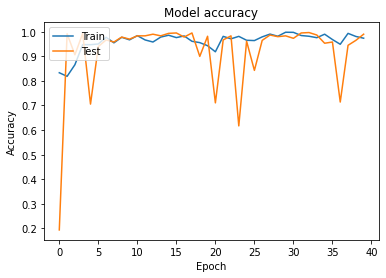

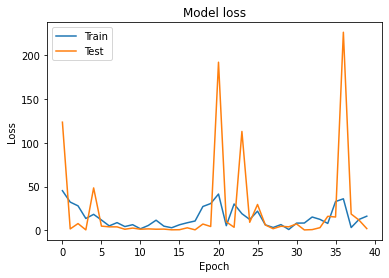

In [ ]:
#print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

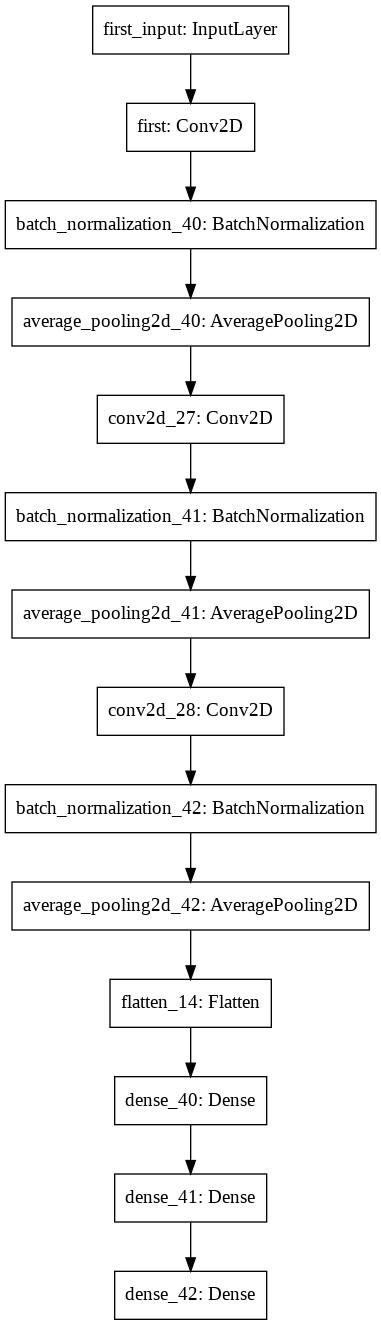

In [ ]:
plot_model(model,to_file="model.jpg")

In [ ]:
test=[]
testY=[]
for filename in os.listdir("/content"):
  if(filename[0:5]=="COVID"):
    image=Image.open("/content/"+str(filename)).convert('LA')
    image=image.resize((224,224))
    data=asarray(image)
    test.append(data)
    testY.append(1)
for i in range(len(test)):
  test[i]=np.resize(test[i],(224,224,1))  
test=np.array(test)
print(test.shape)   

(41, 224, 224, 1)


In [ ]:
model.evaluate(test,testY)

41/41 [==============================] - 0s 964us/step


[11.625750181151599, 0.8292682766914368]

In [ ]:
pred=model.predict_classes(test)
classification_report(testY,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       1.00      0.90      0.95        41\n\n    accuracy                           0.90        41\n   macro avg       0.50      0.45      0.47        41\nweighted avg       1.00      0.90      0.95        41\n'

In [ ]:
print("precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       1.00      0.90      0.95        41\n\n    accuracy                           0.90        41\n   macro avg       0.50      0.45      0.47        41\nweighted avg       1.00      0.90      0.95        41\n'")

precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95        41

    accuracy                           0.90        41
   macro avg       0.50      0.45      0.47        41
weighted avg       1.00      0.90      0.95        41
'


In [ ]:
img=train_orig_X[1214]
img=np.resize(img,(1,224,224,1))
print((model.predict(img)[0]))

[0.]


In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 2.6MB/s 
     |████████████████████████████████| 2.0MB 8.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=14c50a27138be4938b92943f81959822cf30dba500b541d90d596dbb408a4fb4
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
Successfully built lime
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import lime
from lime import lime_image
from skimage.io import imread
from skimage.segmentation import mark_boundaries

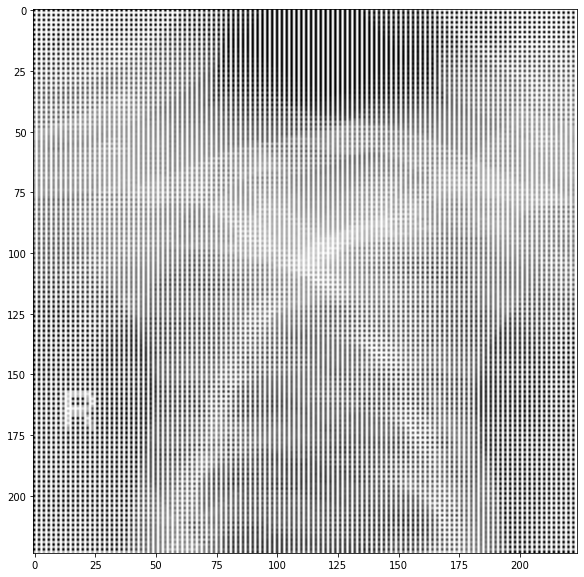

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
img_samp_n = train_orig_X[1214]
img_samp_n.resize(224,224)
plt.imshow(img_samp_n,'gray');

In [ ]:
explainer = lime_image.LimeImageExplainer()
img=np.resize(train_orig_X[1214],(1,224,224,3))
print(img[0].shape)
def convert_to_1channel(img):
  rgb_weights = [0.2989, 0.5870, 0.1140]
  return np.dot(img,rgb_weights)

def new_predict_fn(images):
    images = convert_to_1channel(images)
    img=np.resize(images,(1,224,224,1))
    arr=(model.predict(img))
    return arr
    
explanation = explainer.explain_instance(img[0], new_predict_fn,labels=0
                                         ,top_labels=2, hide_color=0,
                                         distance_metric='cosine',)

(224, 224, 3)


ValueError: ignored